In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import sys
import pandas as pd
import json
import re

In [3]:


EXPERIMENTS_PATH = "/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25"
EXPERIMENTS_PATH = Path(EXPERIMENTS_PATH)
MAP_NAMES = ["StandardStones","ThickStones","Piped","NonConvex"]
METHOD_NAMES = ["Blend","OneControl","TwoControl","Cable", "RadiusDummy", "RadiusRL", "Rect"]
COLORS = ['yellow', 'blue', 'black', 'red', 'orange',
              'purple', 'brown', 'pink', 'gray', 'cyan']
print(list(EXPERIMENTS_PATH.iterdir()))

[PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/readme.md'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/reports'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/ThickStones'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/StandardStones'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/benchmarks.sh'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/array_job.sh'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Empty'), PosixPath('/home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/NonConvex')]


In [4]:
def process_method(analytics_folder) -> tuple[pd.DataFrame,str]:
    data_list = []
    for run in analytics_folder.iterdir():
        run_num = re.search(r'\d+', run.name).group()
        with open(run) as f:

            data = json.load(f)
            flat_data = pd.json_normalize(data).to_dict(orient='records')[0]
            flat_data["run"] = int(run_num)
            data_list.append(flat_data)
    result =pd.DataFrame(data_list)
    result.set_index("run", inplace=True)
    result.sort_index(inplace=True)
    
    return result,analytics_folder.parent.name
    

In [5]:
def show_cumulative_steps(ldf: list[tuple[pd.DataFrame,str]],map_name: str="None"):
    cmap = dict(zip(METHOD_NAMES,COLORS))
    ax = plt.gca()
    fig = plt.gcf()
    
    for df,name in ldf:
        all_results_num = df.shape[0]
        finished = df[df.finished]
        finished.tot_time.sort_values()
        x_pts = []
        s = 0
        y_pts = []
        for pts in finished.tot_time.sort_values():
            x_pts.append(pts)
            s +=1
            y_pts.append(s)
        y_pts = np.array(y_pts)
        x_pts = np.array(x_pts)
        y_pts = y_pts/all_results_num

        ax.plot(x_pts,y_pts,label=name,color=cmap[name])
    plt.legend([name for _,name in ldf])
    plt.xlabel("Time [s]")
    plt.ylabel("Success rate")
    plt.title("Success rate over time on map: "+map_name)

    plt.show()
        

In [6]:
def process_map(map_folder) -> list[tuple[pd.DataFrame,str]]:
    map_folder = Path(map_folder)
    methods = METHOD_NAMES
    print(f"Available methods for map {map_folder.name}: {methods}")
    dfs = []

    for method in methods:
        analytics_folder = map_folder / method / "analytics"
        print(f"Processing {analytics_folder}")
        if not analytics_folder.exists():
            print(f"Folder {analytics_folder} does not exist")
            continue

        print(analytics_folder.parent.name)
        # display(process_method(analytics_folder))
        dfs.append(process_method(analytics_folder))
    return dfs
    
    

Available methods for map Piped: ['Blend', 'OneControl', 'TwoControl', 'Cable', 'RadiusDummy', 'RadiusRL', 'Rect']
Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped/Blend/analytics
Blend
Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped/OneControl/analytics
OneControl
Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped/TwoControl/analytics
TwoControl
Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped/Cable/analytics
Cable
Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped/RadiusDummy/analytics
RadiusDummy
Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped/RadiusRL/analytics
RadiusRL
Processing /home/michal/Documents/Skola/bakalarka/RRT-RL-2D/experiments/RRT/benchmarks_28_2_25/Piped/Rect/ana

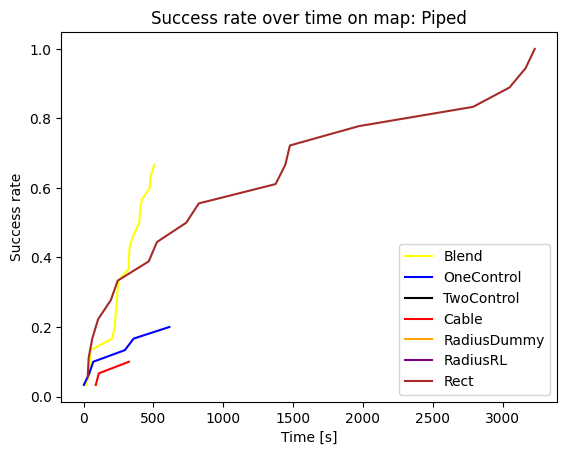

Blend
0.6666666666666666


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,619.108149,7785,False,7126,0,659,400723,30.760080,22.939067,18109,0,68.265398,5.150900,2.630549,2.048337,376.183844
2,249.563465,3423,True,3116,0,307,165400,12.317204,8.851513,7545,149,26.941626,2.234407,1.088266,0.896708,152.131023
3,604.532200,7908,False,7208,0,700,400603,31.281717,26.962753,18024,0,65.590885,5.078863,2.639026,2.032008,366.058884
4,505.358371,7139,True,6527,0,612,351959,26.239612,23.918752,15869,68,52.475071,4.238444,2.314373,1.746508,303.949488
5,40.542340,431,True,396,0,35,29191,2.385653,0.244413,1322,61,4.286332,0.253611,0.189345,0.104381,25.520179
6,43.554851,564,True,523,0,41,31649,2.689468,0.344577,1489,58,4.767357,0.327206,0.212855,0.133325,27.118212
7,235.756623,3315,True,3039,0,276,170593,12.653937,3.984939,7658,95,25.266883,1.929976,1.130236,0.793975,145.703612
8,473.130049,6488,True,5927,0,561,322881,24.760936,23.140887,15085,163,49.627850,3.890575,2.079134,1.591305,281.223869
9,228.642368,3253,True,3010,0,243,165867,12.405988,4.592915,7128,75,24.045296,1.909027,1.039786,0.778128,141.912090


OneControl
0.2


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,677.511236,124333,False,108676,0,15657,400003,30.661934,401.633732,18920,0,54.295191,58.547739,1.289622,6.857675,108.868354
2,814.352787,88942,False,77195,0,11747,400007,45.019462,544.653042,15265,0,48.780023,43.026229,1.469342,5.631779,131.839555
3,1113.769761,128181,False,111875,0,16306,400003,35.277847,819.349577,20297,0,66.580703,59.084246,1.307174,7.131224,111.745733
4,893.779201,115322,False,100141,0,15181,400014,38.835610,616.477480,18649,0,57.802287,53.532968,1.388253,6.471827,114.970808
5,613.867561,90663,True,78978,0,11685,398042,38.632471,365.198560,15729,59,52.258200,41.713078,1.461369,5.055200,114.116741
6,896.668636,115721,False,100765,0,14956,400003,45.297407,613.471973,18764,0,58.187131,52.381049,1.341670,6.417633,121.548966
7,768.146463,106683,False,92370,0,14313,400017,38.065908,494.245729,18116,0,55.452391,50.908335,1.400579,6.033128,117.557184
8,839.048969,118492,False,103078,0,15414,400000,34.491746,564.902589,19046,0,58.497783,54.819911,1.324713,6.469831,109.421988
9,877.814703,117727,False,102551,0,15176,400000,41.020030,594.721874,18606,0,55.681096,56.975039,1.337511,6.728166,118.005687


TwoControl
0.03333333333333333


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,527.615060,79295,False,73213,0,6082,400011,35.387545,297.032532,11186,0,34.806501,38.917348,1.630867,4.601512,120.717522
2,418.420702,47865,False,44233,0,3632,400000,27.858634,231.211781,9021,0,29.192253,22.995135,1.706619,2.776698,111.747187
3,619.916844,74926,False,69022,0,5904,400003,28.260920,400.064017,10881,0,34.969789,35.871057,1.660207,4.400743,114.367652
4,529.819099,68051,False,62936,0,5115,400001,32.899302,316.559284,9682,0,30.083845,33.081093,1.633464,3.999364,118.235415
5,456.556488,78096,False,72126,0,5970,400003,31.184273,233.023754,11266,0,35.529660,35.653325,1.595936,4.459651,116.810581
6,342.322257,48240,False,44627,0,3613,400009,39.181978,141.307019,8354,0,26.732799,24.204717,1.761036,2.839819,125.965170
7,532.911419,73892,False,68358,0,5534,400013,32.132047,311.087821,10344,0,31.576811,37.831726,1.632896,4.370712,118.145596
8,507.972429,60536,False,55974,0,4562,400001,30.530319,305.411023,8934,0,29.332587,28.703028,1.722471,3.575208,115.740891
9,519.960418,63136,False,58334,0,4802,400006,31.306406,305.394900,11271,0,36.899005,29.683467,1.703042,3.788454,117.225642


Cable
0.1


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,558.028291,62535,False,58320,0,4215,400011,24.763360,287.296125,10805,0,36.855045,32.949896,1.648193,3.723653,168.232042
2,549.746366,51442,False,47935,0,3507,400004,31.974480,285.956264,9473,0,33.119657,26.295650,1.730992,3.098182,177.208257
3,593.744828,66015,False,61431,0,4584,400000,24.356313,329.909466,11691,0,39.488297,33.057657,1.612779,3.892048,158.995156
4,655.259290,72698,False,67747,0,4951,400000,27.450169,382.683648,12512,0,43.355282,35.120326,1.527167,4.206581,159.487579
5,108.875887,16031,True,15059,0,972,122305,8.047763,32.337811,3390,57,11.970661,7.822926,0.497462,0.926186,48.857031
6,401.062418,42879,False,39997,0,2882,400046,28.369411,156.431449,8024,0,29.698220,21.690443,1.761656,2.571263,170.398786
7,446.067110,51434,False,48042,0,3392,400003,24.753395,196.670392,9262,0,32.457190,25.858268,1.721416,3.026280,164.881087
8,546.973568,60114,False,56101,0,4013,400000,26.631565,283.269524,10620,0,38.325430,29.703946,1.666735,3.512086,165.680312
9,536.776171,54209,False,50537,0,3672,400000,21.904273,289.346709,9763,0,31.753651,27.193914,1.677566,3.193477,161.105730


RadiusDummy
0.0


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,3517.060859,388633,False,323539,0,65094,400000,117.297129,2607.840622,65131,0,210.956136,241.872326,0.065250,71.115872,354.935720
2,4861.246484,374034,False,311505,0,62529,400000,118.608645,3968.562753,62579,0,206.242058,233.946454,0.141059,68.593383,353.595061
3,3603.229116,381205,False,316040,0,65165,400000,127.264066,2699.728141,65242,0,209.213890,233.600897,0.102630,68.975835,360.562984
4,2605.764826,372676,False,311467,0,61209,400000,114.473513,1740.512964,61257,0,196.112770,223.863926,0.150314,67.408625,349.672488
5,3419.488090,358943,False,299631,0,59312,400000,111.946707,2562.773315,59363,0,198.176563,220.611937,0.220287,65.842712,343.609827
6,4874.957669,369056,False,304396,0,64660,400000,156.298421,3862.154111,64730,0,209.161392,249.465618,0.184763,79.671534,436.948412
7,3839.017461,372195,False,313771,0,58424,400000,117.496228,2980.832427,58465,0,179.819008,232.833081,0.151963,67.873262,350.854827
8,3155.673448,331449,False,275245,0,56204,400000,101.135115,2340.710122,56268,0,185.346911,208.224562,0.375506,61.146916,333.447246
9,3851.490488,382168,False,316893,0,65275,400000,117.825615,2951.690359,65322,0,208.719133,237.940665,0.102877,69.403068,352.873871


RadiusRL
0.0


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
1,1161.827818,108586,False,91056,0,17530,400466,53.771328,339.061265,28234,0,106.064081,82.842593,2.196892,34.211253,414.933362
2,1191.742678,66347,False,55553,0,10794,400001,39.002378,473.029735,16781,0,64.317649,49.594166,2.647249,20.383227,400.335949
3,1842.532346,135112,False,116453,0,18659,400606,73.520410,946.181322,31029,0,119.489139,101.317412,1.995026,41.881612,439.621796
4,1637.813199,143253,False,122432,0,20821,400829,53.980795,757.379907,31333,0,117.361392,108.648325,1.917871,45.081961,418.036438
5,1860.718560,117607,False,97396,0,20211,400000,61.626379,997.749428,31914,0,123.477749,85.710825,2.102541,35.589123,422.149402
6,1898.971332,164753,False,138755,0,25998,400949,64.375122,963.698037,35807,0,140.102414,121.628504,1.715820,50.596444,428.970080
7,1131.024043,82274,False,68956,0,13318,400219,56.363858,343.746083,26178,0,100.731026,63.780000,2.333970,26.070080,412.787530
8,2238.297702,183080,False,159193,0,23887,400371,72.852277,1282.571626,33811,0,125.323576,136.044601,1.524362,56.418214,439.490480
9,2369.182710,118520,False,97284,0,21236,400000,86.506921,1297.831316,32999,0,134.559487,95.426716,2.138083,41.087572,555.249131


Rect
1.0


,tot_time,iterations,finished,collided_cnt,timeout_cnt,reached_cnt,steps_sum,sim_time,storage_time,node_cnt,path_node_cnt,env_times.export_t,env_times.import_t,env_times.render_t,env_times.reset_t,env_times.step_t
run,,,,,,,,,,,,,,,,
2,3049.071847,203174,True,157957,0,45217,213229,13.382492,2801.728152,45402,351,80.125281,92.213754,0.037304,8.536303,39.712939
3,1969.687736,170737,True,129697,0,41040,180329,10.445528,1752.405670,41235,520,76.543770,76.815017,0.035652,6.718702,33.629378
4,29.090954,9106,True,5736,0,3370,14498,0.459609,14.662131,3558,148,7.030089,4.053292,0.018135,0.310463,1.920452
5,103.525434,28765,True,22929,0,5836,35162,1.603119,71.517220,6017,333,11.348298,11.477421,0.022374,0.989809,5.369357
7,2788.810561,211031,True,163154,0,47877,224660,13.140288,2530.389386,48076,357,86.886137,97.369600,0.050297,8.366764,40.104937
8,1444.156105,146886,True,109528,0,37358,155026,8.354879,1257.351189,37551,341,69.686395,64.186005,0.029460,5.417082,26.370210
9,1477.005860,137093,True,105427,0,31666,144876,8.007840,1314.313883,31845,309,56.399198,61.607176,0.029080,5.215096,24.955776
10,61.908335,21818,True,17449,0,4369,26646,1.225229,36.919663,4521,253,8.619025,9.240479,0.016727,0.739978,4.234835
11,3164.382254,208674,True,164575,0,44099,216564,13.522933,2908.275424,44270,522,83.611472,96.129633,0.028221,8.642437,40.561265


In [11]:
# for map_name in MAP_NAMES:
#     map_folder = EXPERIMENTS_PATH / map_name
#     print(f"Processing map {map_name}")
#     process_map(map_folder)
CUR_MAP = "Piped"

dfs =process_map(EXPERIMENTS_PATH / CUR_MAP)
show_cumulative_steps(dfs,CUR_MAP)
for df,name in dfs:
    print(name)
    print(df['finished'].mean())
    display(df.style.set_caption(name))

In [8]:
example_analytics_folder = EXPERIMENTS_PATH / MAP_NAMES[0]/ "Rect" / "analytics"
df = process_method(example_analytics_folder)
display(df)

(        tot_time  iterations  finished  collided_cnt  timeout_cnt  \
 run                                                                 
 1      89.443994       14757      True          6843            0   
 2    1244.575745       74690      True         34767            0   
 3    1532.029941      111605      True         75856            0   
 4     342.881855       46475      True         32911            0   
 5     600.451661       46683      True         24810            0   
 6      22.072434        5093      True          3171            0   
 7     127.380970       32406      True         25607            0   
 8       3.450178         838      True           303            0   
 9     265.110626       34102      True         22559            0   
 10     58.770672       15555      True         11085            0   
 11      1.039784          79      True            44            0   
 12      1.288681         283      True           132            0   
 13      4.064979   

In [9]:
df.tot_time.sort_values()
x_pts = []
s = 0
y_pts = []
for pts in df.tot_time.sort_values():
    x_pts.append(pts)
    s +=1
    y_pts.append(s)
plt.plot(x_pts, y_pts)
plt.show()


AttributeError: 'tuple' object has no attribute 'tot_time'